# CAPSTON PROJECT

**Problem  Understanding** <br>
melakukan analisa terhadap prilaku customer dalam transksaksi pembelian untuk menentukan produk yang dapat direkomendasi dengan tepat sasaran terhadap customer.

**Data Dictionary** <br>
* category_ID = ID unik customer <br>
* category_name = Nama kategori <br>
* subcategory_ID = ID unik dari jenis sub kategori <br>
* subcategory_name = Nama sub kategori <br>
* product_ID = ID unik dari produk <br>
* product_name = Nama Produk
* brand_ID = ID unik dari nama brand <br>
* brand_name = nama brand/merk <br>
* brand_url = link situs brand/merk <br>
* item_ID = ID unik dari detail item <br>
* product_ID = ID unik dari produk <br>
* variation_0_color = variasi warna <br>
* variation_1_color - variasi warna lainnya <br>
* ID = ID unik dari pencatatan <br>
* sku = Stock Keeping unit <br>
* image_url = link gambar item sku <br>
* url_area = link situs sku <br>
* current_price = harga saat ini <br>
* perc.discount = persentase potongan harga (dalam persentase) <br>
* likes_count = Jumlah like <br>
* is_new = status item, baru atau lama <br>
*codCountry = Kode negara



# IMPORT COLAB TO GDRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/capston project narasio/

/content/gdrive/MyDrive/capston project narasio


# IMPORT PACKAGES

In [ ]:
import sqlite3
import pandas as pd

# connect SQLite to Python

In [ ]:
path = '/content/gdrive/MyDrive/capston project narasio/'

In [ ]:
conn = sqlite3.connect(path + 'product_fashion_ratings.db')
cur = conn.cursor()

In [ ]:
cur.execute('''SELECT
                    name
                  FROM
                    sqlite_master
                    WHERE
                      type ='table'
                ''')

In [ ]:
cur.fetchall()

[('products',),
 ('brand_details',),
 ('main_categories',),
 ('sub_categories',),
 ('item_details',),
 ('events',)]

# Data Preparation Using SQL

In [ ]:
df_products = pd.read_sql_query('''
                                Select * From products
                                ''', conn)

In [ ]:
df_products

,index,product_ID,product_name
0,0,1,Chapeau à Visière Anti-UV pour Protection Solaire
1,1,2,Écharpe longue 180cm à pois en broderie pour f...
2,2,3,Casquette de baseball de sport en plein air de...
3,3,4,Casquettes de Baseball Respirantes Unisexe Par...
4,4,5,LYZA Femmes Châle Surdimensionné Réversible Po...
...,...,...,...
13308,13308,13309,Sarouel décontracté à taille élastique
13309,13309,13310,Blouses à demi-manches à imprimé asymétrique
13310,13310,13311,Robe deux pièces décontractée
13311,13311,13312,Oreilles à capuche Cartoon Hoodie


In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13313 entries, 0 to 13312
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         13313 non-null  int64 
 1   product_ID    13313 non-null  int64 
 2   product_name  13313 non-null  object
dtypes: int64(2), object(1)
memory usage: 312.1+ KB


In [ ]:
df_brand = pd.read_sql_query('''
                                Select * From brand_details
                                ''', conn)

In [ ]:
df_brand

,index,brand_ID,brand_name,brand_url
0,0,1,Socofy-1,None
1,1,2,MEANBEAUTY,https://fr.newchic.com/meanbeauty-brand-1436.html
2,2,3,NUZADA,https://fr.newchic.com/nuzada-brand-1434.html
3,3,4,LYZA,https://fr.newchic.com/lyza-brand-1148.html
4,4,5,duni,https://fr.newchic.com/duni-brand-1396.html
...,...,...,...,...
414,414,415,BIMEI,https://fr.newchic.com/bimei-brand-1721.html
415,415,416,Veri Gude,https://fr.newchic.com/veri-gude-brand-1216.html
416,416,417,MC CLAYN,https://fr.newchic.com/mc-clayn-brand-1147.html
417,417,418,DAISSIONI,https://fr.newchic.com/daissioni-brand-1128.html


In [ ]:
df_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       419 non-null    int64 
 1   brand_ID    419 non-null    int64 
 2   brand_name  419 non-null    object
 3   brand_url   398 non-null    object
dtypes: int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
df_MainCategori = pd.read_sql_query('''
                                Select * From main_categories
                                ''', conn)

In [ ]:
df_MainCategori

,index,category_ID,category_name
0,0,1,accessories
1,1,2,bags
2,2,3,beauty
3,3,4,house
4,4,5,jewelry
5,5,6,kids
6,6,7,men
7,7,8,shoes
8,8,9,women


In [ ]:
df_subcategori = pd.read_sql_query('''
                                Select * From sub_categories
                                ''', conn)

In [ ]:
df_subcategori

,index,subcategory_ID,subcategory_name
0,0,1,Écriture & Peinture
1,1,2,Épilateur
2,2,3,Éponges
3,3,4,Étui & Étagère
4,4,5,Étui & Sac des monnaies
...,...,...,...
446,446,447,Wine Decanters
447,447,448,Wine Glasses
448,448,449,Wine Racks
449,449,450,Wine Stoppers


In [ ]:
df_item = pd.read_sql_query('''
              select *
              from item_details''', conn)

In [ ]:
df_item

,index,item_ID,product_ID,variation_0_color,variation_1_color
0,0,1,1,Bleu ciel,Gris
1,1,2,2,armée verte,Bleu
2,2,3,3,#1,#2
3,3,4,4,rouge,Bleu
4,4,5,5,Rose,Bleu
...,...,...,...,...,...
13984,13984,13985,13309,armée verte,kaki
13985,13985,13986,13310,Noir,blanc
13986,13986,13987,13311,Green,Yellow
13987,13987,13988,13312,Pink,Navy


In [ ]:
df_event = pd.read_sql_query('''
                                select *
                                from events''', conn)
df_event

,index,ID,sku,image_url,url_area,product_ID,brand_ID,category_ID,subcategory_ID,item_ID,current_price,perc.discount,likes_count,is_new,codCountry
0,0,27788,SKU585926,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/loskii-wall-art-4619/p-...,4636,120,4,21,4677,21.48 USD,42.0,285,0,"ID,MY,PH,SG,TH,VN"
1,1,42560,SKU028546,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/plus-size-blouses-and-s...,9862,396,9,98,10372,22.99 USD,65.0,147,0,"ID,MY,PH,SG,TH,VN"
2,2,45211,SKU031964,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/beon-vehicle-supplies-5...,3620,246,4,232,3658,1.59 USD,58.0,1,0,"ID,MY,PH,SG,TH,VN"
3,3,48169,SKU037769,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/y-f-m-face-care-tools-5...,1144,73,3,10,1168,19.03 USD,43.0,500,0,"ID,MY,PH,SG,TH,VN"
4,4,51841,SKU039460,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/t-shirts-3666/p-51841.html,9315,396,9,427,9761,21.99 USD,0.0,251,0,"ID,MY,PH,SG,TH,VN"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14156,14156,1723915,SKUF75050,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8824,20,8,101,9143,29.99 USD,55.0,2,1,"ID,MY,PH,SG,TH,VN"
14157,14157,1723920,SKUF74844,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8835,20,8,101,9154,32.99 USD,53.0,2,1,"ID,MY,PH,SG,TH,VN"
14158,14158,1723924,SKUF74850,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8836,20,8,101,9155,32.99 USD,50.0,1,1,"ID,MY,PH,SG,TH,VN"
14159,14159,1723927,SKUF76422,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/lostisy-flats-3615/p-17...,8798,378,8,142,9117,29.99 USD,50.0,2,1,"ID,MY,PH,SG,TH,VN"


In [ ]:
data_products = pd.read_sql_query('''
                            Select 
                            products.*,
                            item_details.*
                            From products
                            LEFT JOIN item_details
                            ON products.product_ID = item_details.product_ID

                                ''', conn)

In [ ]:
data_products.head()

,index,product_ID,product_name,index,item_ID,product_ID,variation_0_color,variation_1_color
0,0,1,Chapeau à Visière Anti-UV pour Protection Solaire,0,1,1,Bleu ciel,Gris
1,1,2,Écharpe longue 180cm à pois en broderie pour f...,1,2,2,armée verte,Bleu
2,2,3,Casquette de baseball de sport en plein air de...,2,3,3,#1,#2
3,3,4,Casquettes de Baseball Respirantes Unisexe Par...,3,4,4,rouge,Bleu
4,4,5,LYZA Femmes Châle Surdimensionné Réversible Po...,4,5,5,Rose,Bleu


In [ ]:
data_events = pd.read_sql_query('''
                                    select
                                    events.*,
                                    main_categories.category_name
                                    From events
                                    LEFT JOIN main_categories
                                    ON events.category_ID = main_categories.category_ID
                                    ''', conn)

In [ ]:
data_events

,index,ID,sku,image_url,url_area,product_ID,brand_ID,category_ID,subcategory_ID,item_ID,current_price,perc.discount,likes_count,is_new,codCountry,category_name
0,0,27788,SKU585926,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/loskii-wall-art-4619/p-...,4636,120,4,21,4677,21.48 USD,42.0,285,0,"ID,MY,PH,SG,TH,VN",house
1,1,42560,SKU028546,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/plus-size-blouses-and-s...,9862,396,9,98,10372,22.99 USD,65.0,147,0,"ID,MY,PH,SG,TH,VN",women
2,2,45211,SKU031964,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/beon-vehicle-supplies-5...,3620,246,4,232,3658,1.59 USD,58.0,1,0,"ID,MY,PH,SG,TH,VN",house
3,3,48169,SKU037769,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/y-f-m-face-care-tools-5...,1144,73,3,10,1168,19.03 USD,43.0,500,0,"ID,MY,PH,SG,TH,VN",beauty
4,4,51841,SKU039460,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/t-shirts-3666/p-51841.html,9315,396,9,427,9761,21.99 USD,0.0,251,0,"ID,MY,PH,SG,TH,VN",women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14156,14156,1723915,SKUF75050,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8824,20,8,101,9143,29.99 USD,55.0,2,1,"ID,MY,PH,SG,TH,VN",shoes
14157,14157,1723920,SKUF74844,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8835,20,8,101,9154,32.99 USD,53.0,2,1,"ID,MY,PH,SG,TH,VN",shoes
14158,14158,1723924,SKUF74850,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8836,20,8,101,9155,32.99 USD,50.0,1,1,"ID,MY,PH,SG,TH,VN",shoes
14159,14159,1723927,SKUF76422,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/lostisy-flats-3615/p-17...,8798,378,8,142,9117,29.99 USD,50.0,2,1,"ID,MY,PH,SG,TH,VN",shoes


In [ ]:
df_events = pd.read_sql_query('''
                             select
                                  events.*,
                                  sub_categories.subcategory_name,
                                  item_details.variation_0_color,
                                  item_details.variation_1_color,
                                  products.product_name,
                                  main_categories.category_name,
                                  brand_details.brand_name
                                  from events
                                  LEFT JOIN products
                                  ON (events.subcategory_ID = products.product_ID)
                                  LEFT JOIN brand_details
                                  ON (events.brand_ID = brand_details.brand_ID)
                                  LEFT JOIN main_categories
                                  ON (events.category_ID = main_categories.category_ID)
                                  LEFT JOIN sub_categories
                                  on (events.subcategory_ID = sub_categories.subcategory_ID)
                                  LEFT JOIN item_details
                                  on (events.item_ID = item_details.item_ID)
                                  ''', conn)

In [ ]:
df_events

,index,ID,sku,image_url,url_area,product_ID,brand_ID,category_ID,subcategory_ID,item_ID,current_price,perc.discount,likes_count,is_new,codCountry,subcategory_name,variation_0_color,variation_1_color,product_name,category_name,brand_name
0,0,27788,SKU585926,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/loskii-wall-art-4619/p-...,4636,120,4,21,4677,21.48 USD,42.0,285,0,"ID,MY,PH,SG,TH,VN",ART MURAL,None,None,Echarpe en coton sauvage,house,Loskii
1,1,42560,SKU028546,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/plus-size-blouses-and-s...,9862,396,9,98,10372,22.99 USD,65.0,147,0,"ID,MY,PH,SG,TH,VN",Chemises,Noir,blanc,Écharpe en soie Vintage Vogue Cotton Soft,women,ZANZEA
2,2,45211,SKU031964,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/beon-vehicle-supplies-5...,3620,246,4,232,3658,1.59 USD,58.0,1,0,"ID,MY,PH,SG,TH,VN",Lumières,None,None,Sac bandoulière en nylon waterproof multi-fent...,house,BEON
3,3,48169,SKU037769,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/y-f-m-face-care-tools-5...,1144,73,3,10,1168,19.03 USD,43.0,500,0,"ID,MY,PH,SG,TH,VN",Accessoires soin visage,None,None,Foulards d'hiver de serviette d'impression num...,beauty,Y.F.M
4,4,51841,SKU039460,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/t-shirts-3666/p-51841.html,9315,396,9,427,9761,21.99 USD,0.0,251,0,"ID,MY,PH,SG,TH,VN",T-Shirts,Noir,None,Pochette de téléphone en cuir de vachette Cein...,women,ZANZEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14156,14156,1723915,SKUF75050,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8824,20,8,101,9143,29.99 USD,55.0,2,1,"ID,MY,PH,SG,TH,VN",Claquettes & Tongs,Pink,Green,ZENPH 125cm Nylon Ceinture tactique à partir d...,shoes,Socofy
14157,14157,1723920,SKUF74844,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8835,20,8,101,9154,32.99 USD,53.0,2,1,"ID,MY,PH,SG,TH,VN",Claquettes & Tongs,Pink,Blue,ZENPH 125cm Nylon Ceinture tactique à partir d...,shoes,Socofy
14158,14158,1723924,SKUF74850,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8836,20,8,101,9155,32.99 USD,50.0,1,1,"ID,MY,PH,SG,TH,VN",Claquettes & Tongs,Green,Dark Blue,ZENPH 125cm Nylon Ceinture tactique à partir d...,shoes,Socofy
14159,14159,1723927,SKUF76422,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/lostisy-flats-3615/p-17...,8798,378,8,142,9117,29.99 USD,50.0,2,1,"ID,MY,PH,SG,TH,VN",Derbies & Mocassins,gris,None,Sac à bandoulière multifonction Design Business,shoes,Lostisy


In [ ]:
#df_events.to_csv(path + 'df_events.csv', index =False)

In [ ]:
conn.commit()
conn.close()

# PROBLEM STATEMENT

a. melakukan profiling perusahaan, agar bisa mendapatkan informasi produk apa saja yang dimiliki perusahaan ini, serta apakah perlu diperluas variasi produknya serta pendistribusiannya.

b. memberikan product recommendation agar bisa meningkatkan revenue.



1. bagaimana profiling perusahaan dalam memasarkan produknya ?
2. product apa yang dapat direkomndasikan kepada konsumen  dengan peluang akan dibeli tinggi oleh konsumen ?
3. brand apa saja yang paling disukai oleh konsumen ?
4. warna desain produk yang paling disukai dan kurang disukai seperti apa ?
5. subcategori apa yang paling diminati oleh konsumen ? 
6. product apa yang paling banyak diminati oleh para konsumen ? 
7. categori name apa yang paling diminati oleh para konsumen ? 
8. brand apa yang memiliki high profit ?


# DATA CLEANSING

In [ ]:
events = pd.read_csv('df_events.csv')

In [ ]:
events.head()

,index,ID,sku,image_url,url_area,product_ID,brand_ID,category_ID,subcategory_ID,item_ID,current_price,perc.discount,likes_count,is_new,codCountry,subcategory_name,variation_0_color,variation_1_color,product_name,category_name,brand_name
0,0,27788,SKU585926,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/loskii-wall-art-4619/p-...,4636,120,4,21,4677,21.48 USD,42.0,285,0,"ID,MY,PH,SG,TH,VN",ART MURAL,NaN,NaN,Echarpe en coton sauvage,house,Loskii
1,1,42560,SKU028546,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/plus-size-blouses-and-s...,9862,396,9,98,10372,22.99 USD,65.0,147,0,"ID,MY,PH,SG,TH,VN",Chemises,Noir,blanc,Écharpe en soie Vintage Vogue Cotton Soft,women,ZANZEA
2,2,45211,SKU031964,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/beon-vehicle-supplies-5...,3620,246,4,232,3658,1.59 USD,58.0,1,0,"ID,MY,PH,SG,TH,VN",Lumières,NaN,NaN,Sac bandoulière en nylon waterproof multi-fent...,house,BEON
3,3,48169,SKU037769,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/y-f-m-face-care-tools-5...,1144,73,3,10,1168,19.03 USD,43.0,500,0,"ID,MY,PH,SG,TH,VN",Accessoires soin visage,NaN,NaN,Foulards d'hiver de serviette d'impression num...,beauty,Y.F.M
4,4,51841,SKU039460,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/t-shirts-3666/p-51841.html,9315,396,9,427,9761,21.99 USD,0.0,251,0,"ID,MY,PH,SG,TH,VN",T-Shirts,Noir,NaN,Pochette de téléphone en cuir de vachette Cein...,women,ZANZEA


In [ ]:
events.tail()

,index,ID,sku,image_url,url_area,product_ID,brand_ID,category_ID,subcategory_ID,item_ID,current_price,perc.discount,likes_count,is_new,codCountry,subcategory_name,variation_0_color,variation_1_color,product_name,category_name,brand_name
14156,14156,1723915,SKUF75050,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8824,20,8,101,9143,29.99 USD,55.0,2,1,"ID,MY,PH,SG,TH,VN",Claquettes & Tongs,Pink,Green,ZENPH 125cm Nylon Ceinture tactique à partir d...,shoes,Socofy
14157,14157,1723920,SKUF74844,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8835,20,8,101,9154,32.99 USD,53.0,2,1,"ID,MY,PH,SG,TH,VN",Claquettes & Tongs,Pink,Blue,ZENPH 125cm Nylon Ceinture tactique à partir d...,shoes,Socofy
14158,14158,1723924,SKUF74850,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8836,20,8,101,9155,32.99 USD,50.0,1,1,"ID,MY,PH,SG,TH,VN",Claquettes & Tongs,Green,Dark Blue,ZENPH 125cm Nylon Ceinture tactique à partir d...,shoes,Socofy
14159,14159,1723927,SKUF76422,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/lostisy-flats-3615/p-17...,8798,378,8,142,9117,29.99 USD,50.0,2,1,"ID,MY,PH,SG,TH,VN",Derbies & Mocassins,gris,NaN,Sac à bandoulière multifonction Design Business,shoes,Lostisy
14160,14160,1724666,SKUF92118,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/camel-sneakersandathlet...,7719,384,8,41,7982,98.99 USD,55.0,0,1,VN,Baskets,Black,Grey,Casquette de baseball imprimée,shoes,CAMEL


In [ ]:
events.shape

(14161, 21)

In [ ]:
#check duplicated data
events.loc[events.duplicated(keep=False), :]

,index,ID,sku,image_url,url_area,product_ID,brand_ID,category_ID,subcategory_ID,item_ID,current_price,perc.discount,likes_count,is_new,codCountry,subcategory_name,variation_0_color,variation_1_color,product_name,category_name,brand_name


tidak ada data yang terduplikat

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14161 entries, 0 to 14160
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              14161 non-null  int64  
 1   ID                 14161 non-null  int64  
 2   sku                14161 non-null  object 
 3   image_url          14161 non-null  object 
 4   url_area           14161 non-null  object 
 5   product_ID         14161 non-null  int64  
 6   brand_ID           14161 non-null  int64  
 7   category_ID        14161 non-null  int64  
 8   subcategory_ID     14161 non-null  int64  
 9   item_ID            14161 non-null  int64  
 10  current_price      14151 non-null  object 
 11  perc.discount      14156 non-null  float64
 12  likes_count        14161 non-null  int64  
 13  is_new             14161 non-null  int64  
 14  codCountry         13018 non-null  object 
 15  subcategory_name   14161 non-null  object 
 16  variation_0_color  116

1.pada data set ini type data untuk current_price tidak sesuai karena type datanya masih berupa obejct, hal ini dikarenakan penulisan data pada colomn current_price mengikutkan 'USD' sehingga perlu dilakukan penghapusan terlebih dahulu lalu konversikan ke bentuk float atau int.


2. terdapat missing value pada kolom variation_1_color, kolom CodCountry dan current price.


 

In [ ]:
(events.isnull().sum())/(len(events))*100

index                 0.000000
ID                    0.000000
sku                   0.000000
image_url             0.000000
url_area              0.000000
product_ID            0.000000
brand_ID              0.000000
category_ID           0.000000
subcategory_ID        0.000000
item_ID               0.000000
current_price         0.070616
perc.discount         0.035308
likes_count           0.000000
is_new                0.000000
codCountry            8.071464
subcategory_name      0.000000
variation_0_color    18.056634
variation_1_color    33.133253
product_name          0.000000
category_name         0.000000
brand_name            0.000000
dtype: float64

missing value pada kolom varation_0_color sebesar 18,06%
variation_1_color sebesar 33,13%
current price dan per.discount sebesar 0.07% dan 0.04%
pada kolom CodCountry sebesar 8.07%

In [ ]:
events['current_price'] = events['current_price'].str.replace(' USD',"")

In [ ]:
events['current_price'] = events.current_price.astype('float')

In [ ]:
events['current_price'].fillna(events['current_price'].median(), inplace=True)

In [ ]:
events['perc.discount'].fillna(events['perc.discount'].median(), inplace=True)

In [ ]:
events['codCountry'].fillna(events['codCountry'].mode()[0], inplace=True)

In [ ]:
events['variation_0_color'].fillna(events['variation_0_color'].mode()[0], inplace =True)

In [ ]:
events['variation_1_color'].fillna(events['variation_1_color'].mode()[0], inplace =True)

In [ ]:
events.isnull().sum()

index                0
ID                   0
sku                  0
image_url            0
url_area             0
product_ID           0
brand_ID             0
category_ID          0
subcategory_ID       0
item_ID              0
current_price        0
perc.discount        0
likes_count          0
is_new               0
codCountry           0
subcategory_name     0
variation_0_color    0
variation_1_color    0
product_name         0
category_name        0
brand_name           0
dtype: int64

missing value sudah bersih

In [ ]:
events = events.reset_index()

In [ ]:
events.drop('index', axis =1 , inplace=True)

In [ ]:
events

,level_0,ID,sku,image_url,url_area,product_ID,brand_ID,category_ID,subcategory_ID,item_ID,current_price,perc.discount,likes_count,is_new,codCountry,subcategory_name,variation_0_color,variation_1_color,product_name,category_name,brand_name
0,0,27788,SKU585926,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/loskii-wall-art-4619/p-...,4636,120,4,21,4677,21.48,42.0,285,0,"ID,MY,PH,SG,TH,VN",ART MURAL,Black,Noir,Echarpe en coton sauvage,house,Loskii
1,1,42560,SKU028546,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/plus-size-blouses-and-s...,9862,396,9,98,10372,22.99,65.0,147,0,"ID,MY,PH,SG,TH,VN",Chemises,Noir,blanc,Écharpe en soie Vintage Vogue Cotton Soft,women,ZANZEA
2,2,45211,SKU031964,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/beon-vehicle-supplies-5...,3620,246,4,232,3658,1.59,58.0,1,0,"ID,MY,PH,SG,TH,VN",Lumières,Black,Noir,Sac bandoulière en nylon waterproof multi-fent...,house,BEON
3,3,48169,SKU037769,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/y-f-m-face-care-tools-5...,1144,73,3,10,1168,19.03,43.0,500,0,"ID,MY,PH,SG,TH,VN",Accessoires soin visage,Black,Noir,Foulards d'hiver de serviette d'impression num...,beauty,Y.F.M
4,4,51841,SKU039460,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/t-shirts-3666/p-51841.html,9315,396,9,427,9761,21.99,0.0,251,0,"ID,MY,PH,SG,TH,VN",T-Shirts,Noir,Noir,Pochette de téléphone en cuir de vachette Cein...,women,ZANZEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14156,14156,1723915,SKUF75050,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8824,20,8,101,9143,29.99,55.0,2,1,"ID,MY,PH,SG,TH,VN",Claquettes & Tongs,Pink,Green,ZENPH 125cm Nylon Ceinture tactique à partir d...,shoes,Socofy
14157,14157,1723920,SKUF74844,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8835,20,8,101,9154,32.99,53.0,2,1,"ID,MY,PH,SG,TH,VN",Claquettes & Tongs,Pink,Blue,ZENPH 125cm Nylon Ceinture tactique à partir d...,shoes,Socofy
14158,14158,1723924,SKUF74850,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8836,20,8,101,9155,32.99,50.0,1,1,"ID,MY,PH,SG,TH,VN",Claquettes & Tongs,Green,Dark Blue,ZENPH 125cm Nylon Ceinture tactique à partir d...,shoes,Socofy
14159,14159,1723927,SKUF76422,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/lostisy-flats-3615/p-17...,8798,378,8,142,9117,29.99,50.0,2,1,"ID,MY,PH,SG,TH,VN",Derbies & Mocassins,gris,Noir,Sac à bandoulière multifonction Design Business,shoes,Lostisy


In [ ]:
events.tail()

,level_0,ID,sku,image_url,url_area,product_ID,brand_ID,category_ID,subcategory_ID,item_ID,current_price,perc.discount,likes_count,is_new,codCountry,subcategory_name,variation_0_color,variation_1_color,product_name,category_name,brand_name
14156,14156,1723915,SKUF75050,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8824,20,8,101,9143,29.99,55.0,2,1,"ID,MY,PH,SG,TH,VN",Claquettes & Tongs,Pink,Green,ZENPH 125cm Nylon Ceinture tactique à partir d...,shoes,Socofy
14157,14157,1723920,SKUF74844,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8835,20,8,101,9154,32.99,53.0,2,1,"ID,MY,PH,SG,TH,VN",Claquettes & Tongs,Pink,Blue,ZENPH 125cm Nylon Ceinture tactique à partir d...,shoes,Socofy
14158,14158,1723924,SKUF74850,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8836,20,8,101,9155,32.99,50.0,1,1,"ID,MY,PH,SG,TH,VN",Claquettes & Tongs,Green,Dark Blue,ZENPH 125cm Nylon Ceinture tactique à partir d...,shoes,Socofy
14159,14159,1723927,SKUF76422,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/lostisy-flats-3615/p-17...,8798,378,8,142,9117,29.99,50.0,2,1,"ID,MY,PH,SG,TH,VN",Derbies & Mocassins,gris,Noir,Sac à bandoulière multifonction Design Business,shoes,Lostisy
14160,14160,1724666,SKUF92118,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/camel-sneakersandathlet...,7719,384,8,41,7982,98.99,55.0,0,1,VN,Baskets,Black,Grey,Casquette de baseball imprimée,shoes,CAMEL


dari informasi nilai unique di atas terdapat suatu insight yang didapat, yaitu 

pada  variation_0_color dan variation_1_color, jika nilai uniquenya diklempokkan menjadi warna dasar dan warna modifikasi, maka kita dapat mengetahui kategori warna yang banyak dibeli oleh customer.

saya membagi warna dasar menjadi : hitam,putih,biru, hija, dan kuning. 
selain dari warna di atas menjadi warna yang dimodifikasi.


In [ ]:
def color(variation_0_color):
    if(variation_0_color=='Noir'):
        return 'Black'
    if (variation_0_color == 'Blanc'):
        return 'White'
    if (variation_0_color == 'Bleu'):
        return 'Blue'
    if (variation_0_color == 'Vert'):
        return 'Green'
    if (variation_0_color == 'Rouge'):
      return 'Red'
    if (variation_0_color == 'Jaune'):
      return 'Yellow'
    else: 
        return 'Modification'
events['colors']=events['variation_0_color'].apply(color)
events.colors.value_counts()

Modification    12374
Black             950
Blue              559
Yellow            245
White              33
Name: colors, dtype: int64

In [ ]:
def color(variation_1_color):
    if(variation_1_color=='Noir'):
        return 'Black'
    if (variation_1_color == 'Blanc'):
        return 'White'
    if (variation_1_color == 'Bleu'):
        return 'Blue'
    if (variation_1_color == 'Vert'):
        return 'Green'
    if (variation_1_color == 'Rouge'):
      return 'Red'
    if (variation_1_color == 'Jaune'):
      return 'Yellow'
    else: 
        return 'Modification'
events['colors1']=events['variation_1_color'].apply(color)
events.colors1.value_counts()

Modification    8103
Black           5318
Blue             485
Yellow           211
White             44
Name: colors1, dtype: int64

In [ ]:
def product_status(is_new):
    if(is_new==0):
        return 'old'
  
    else: 
        return 'new'
events['product status']=events['is_new'].apply(product_status)
events['product status'].value_counts()

old    13575
new      586
Name: product status, dtype: int64

In [ ]:
events.drop(['level_0','ID','image_url','url_area','variation_0_color','variation_1_color'], axis =1, inplace=True)

In [ ]:
events = events.rename(columns  = {'current_price':'price','perc.discount':'percentage discount','product_name':'product name','is_new':'is new','likes_count':'likes count',
                                   'subcategory_name':'subcategory name','category_name':'category name','brand_name':'brand name','codCountry':'cod country',
                                   'subcategory_ID':'subcategory ID','item_ID':'item ID','product_ID':'product ID','brand_ID':'brand ID'})

In [ ]:
#events.to_csv(path + 'events_clean.csv', index =False)

In [ ]:
events

,sku,product ID,brand ID,category_ID,subcategory ID,item ID,price,percentage discount,likes count,is new,cod country,subcategory name,product name,category name,brand name,colors,colors1,product status
0,SKU585926,4636,120,4,21,4677,21.48,42.0,285,0,"ID,MY,PH,SG,TH,VN",ART MURAL,Echarpe en coton sauvage,house,Loskii,Modification,Black,old
1,SKU028546,9862,396,9,98,10372,22.99,65.0,147,0,"ID,MY,PH,SG,TH,VN",Chemises,Écharpe en soie Vintage Vogue Cotton Soft,women,ZANZEA,Black,Modification,old
2,SKU031964,3620,246,4,232,3658,1.59,58.0,1,0,"ID,MY,PH,SG,TH,VN",Lumières,Sac bandoulière en nylon waterproof multi-fent...,house,BEON,Modification,Black,old
3,SKU037769,1144,73,3,10,1168,19.03,43.0,500,0,"ID,MY,PH,SG,TH,VN",Accessoires soin visage,Foulards d'hiver de serviette d'impression num...,beauty,Y.F.M,Modification,Black,old
4,SKU039460,9315,396,9,427,9761,21.99,0.0,251,0,"ID,MY,PH,SG,TH,VN",T-Shirts,Pochette de téléphone en cuir de vachette Cein...,women,ZANZEA,Black,Black,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14156,SKUF75050,8824,20,8,101,9143,29.99,55.0,2,1,"ID,MY,PH,SG,TH,VN",Claquettes & Tongs,ZENPH 125cm Nylon Ceinture tactique à partir d...,shoes,Socofy,Modification,Modification,new
14157,SKUF74844,8835,20,8,101,9154,32.99,53.0,2,1,"ID,MY,PH,SG,TH,VN",Claquettes & Tongs,ZENPH 125cm Nylon Ceinture tactique à partir d...,shoes,Socofy,Modification,Modification,new
14158,SKUF74850,8836,20,8,101,9155,32.99,50.0,1,1,"ID,MY,PH,SG,TH,VN",Claquettes & Tongs,ZENPH 125cm Nylon Ceinture tactique à partir d...,shoes,Socofy,Modification,Modification,new
14159,SKUF76422,8798,378,8,142,9117,29.99,50.0,2,1,"ID,MY,PH,SG,TH,VN",Derbies & Mocassins,Sac à bandoulière multifonction Design Business,shoes,Lostisy,Modification,Black,new


# Exploration Data Analysis

In [ ]:
events['price after discount'] = events['price'] - (events['price']*events['percentage discount']/100)

In [ ]:
events.describe()

,product ID,brand ID,category_ID,subcategory ID,item ID,price,percentage discount,likes count,is new,price after discount
count,14161.00000,14161.000000,14161.000000,14161.000000,14161.000000,14161.000000,14161.000000,14161.000000,14161.000000,14161.000000
mean,6704.54982,257.963491,6.413813,242.239743,6966.287833,26.744000,52.023798,284.445590,0.041381,12.894957
std,3805.58857,141.142258,2.442258,119.067243,4041.102422,33.625731,10.754657,693.010028,0.199177,16.389391
min,1.00000,1.000000,1.000000,1.000000,1.000000,0.740000,0.000000,0.000000,0.000000,0.030800
25%,3419.00000,154.000000,4.000000,136.000000,3457.000000,15.110000,46.000000,42.000000,0.000000,6.688800
50%,6809.00000,355.000000,7.000000,255.000000,6971.000000,22.080000,51.000000,103.000000,0.000000,10.555200
75%,9943.00000,394.000000,9.000000,336.000000,10457.000000,30.700000,59.000000,250.000000,0.000000,15.385900
max,13313.00000,419.000000,9.000000,451.000000,13989.000000,1899.990000,96.000000,15203.000000,1.000000,892.995300


dari informasi diatas kita ketahui bahwa :
1. harga minimal penjualan yang terjual adalah 0.74 USD, harga maximal yaitu 1899 USD, dan rata rata harga barang yang terjual dengan harga asli yaitu 26 USD.  
2. harga diskon minimal yaitu 0% (tidak ada disko yang ditawarkan), diskon maximal 96%, dan rata rata barang yang dijual dengan percent diskon 53%.
3. terdapat penjualan dengan jumlah like 0 (mungkin barang yang dibeli tidak disukai atau tidak sesuai dengan yang ditawarkan), terdapat barang dengan jumlah like tertinggi yaitu 15203, dan rata rata barang mendapat like yaitu 284.
4. rata rata barang baru yaitu 4% dari keseluruhan barang di jual, sedangkan rata rata barang kategori lama terjual 96%.
5. rata rata harga setelah diskon adalah 12.89 USD.

In [ ]:
events.corr()

,product ID,brand ID,category_ID,subcategory ID,item ID,price,percentage discount,likes count,is new,price after discount
product ID,1.000000,0.772410,0.954390,-0.047644,0.999780,0.030935,0.252739,0.080431,0.129679,-0.004329
brand ID,0.772410,1.000000,0.794972,0.081914,0.770072,-0.058431,0.078734,0.003084,0.131513,-0.048367
category_ID,0.954390,0.794972,1.000000,-0.032478,0.953338,0.041935,0.253606,0.093156,0.145688,0.005093
subcategory ID,-0.047644,0.081914,-0.032478,1.000000,-0.049020,0.038311,-0.094312,-0.039630,0.013497,0.063177
item ID,0.999780,0.770072,0.953338,-0.049020,1.000000,0.029673,0.257182,0.080074,0.128561,-0.006196
price,0.030935,-0.058431,0.041935,0.038311,0.029673,1.000000,-0.017754,0.028559,-0.000493,0.977369
percentage discount,0.252739,0.078734,0.253606,-0.094312,0.257182,-0.017754,1.000000,0.020573,-0.012328,-0.177528
likes count,0.080431,0.003084,0.093156,-0.039630,0.080074,0.028559,0.020573,1.000000,-0.084056,0.027102
is new,0.129679,0.131513,0.145688,0.013497,0.128561,-0.000493,-0.012328,-0.084056,1.000000,0.001659
price after discount,-0.004329,-0.048367,0.005093,0.063177,-0.006196,0.977369,-0.177528,0.027102,0.001659,1.000000


In [ ]:
events.describe(include='object')

,sku,cod country,subcategory name,product name,category name,brand name,colors,colors1,product status
count,14161,14161,14161,14161,14161,14161,14161,14161,14161
unique,14099,11,451,451,9,419,5,5,2
top,SKUA23559,"ID,MY,PH,SG,TH,VN",Shirts,Portefeuille court amovible à fermeture éclair,women,ZANZEA,Modification,Modification,old
freq,2,13452,935,935,4816,1683,12374,8103,13575


dari informasi diatasi dipatkan :
1. subcategory shirts adalah yang paling banyak dibeli dengan total penjualan 935.
2. nama product terlaris yaitu Portefeuille court amovible à fermeture éclair.
3. category nama yang paling banyak terjual adalah women.
4. brand  yang paling banyak terjual adalah ZANZAE.
5. warna yang paling banyak terjual adalah warna yang dimodifikasi ( pencampuran warna) pada product.
6. barang  yang paling banyak terjual adalah barnag berstatus 'old'

In [ ]:
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [ ]:
#memriksa barang dengan jumlah like terbanyak dan tersedikit
print('jumlah like terbanyak', events['likes count'].max())
print('jumlah like tersedikit', events['likes count'].min())

jumlah like terbanyak 15203
jumlah like tersedikit 0


In [ ]:
events[events['likes count']==15203]

,sku,product ID,brand ID,category_ID,subcategory ID,item ID,price,percentage discount,likes count,is new,cod country,subcategory name,product name,category name,brand name,colors,colors1,product status,price after discount
182,SKU350193,8467,378,8,142,8777,30.08,45.0,15203,0,"ID,MY,PH,SG,TH,VN",Derbies & Mocassins,Sac à bandoulière multifonction Design Business,shoes,Lostisy,Black,Modification,old,16.544


1.product dengan like tertinggi adalah  Sac à bandoulière multifonction Design Business, dengan kategori shoes, subkategori Derbies & Mocassins, nama brand Lostisy, dengan warna black dan modification, dengan status porduct 'old' dengan harga 30.08 USD dengan percent diskount yang ditawarkan adalah 45%. 
2. product tersedia di ID,MY,PH,SG,TH,VN

In [ ]:
events[events['likes count']==0]

,sku,product ID,brand ID,category_ID,subcategory ID,item ID,price,percentage discount,likes count,is new,cod country,subcategory name,product name,category name,brand name,colors,colors1,product status,price after discount
1577,SKU675176,3841,138,4,423,3879,7.59,59.0,0,1,"ID,MY,PH,SG,TH,VN",Toys,Bullcaptain Men RFID Portefeuille en cuir véri...,house,DIGOO,Modification,Black,new,3.1119
2549,SKU843382,3108,236,4,64,3146,5.27,58.0,0,0,"ID,MY,PH,SG,TH,VN",Bougies & Bougeoirs,Casquette respirante pour homme,house,LEORY,Modification,Black,old,2.2134
3195,SKU936893,1230,140,3,389,1255,29.99,57.0,0,1,"ID,MY,PH,SG,TH,VN",Sports Equipments,Pochette décontractée pour homme d'affaires à ...,beauty,YUNMAI,Modification,Black,new,12.8957
4036,SKU995900,2269,113,4,170,2301,12.59,47.0,0,0,"ID,MY,TH",Fourniture de brosse à dents,KAKA Sac de poitrine Oxford Casual USB Chargin...,house,SOOCAS,Modification,Black,old,6.6727
5147,SKUA35453,1235,99,3,389,1260,7.99,47.0,0,1,"ID,MY,PH,SG,TH,VN",Sports Equipments,Pochette décontractée pour homme d'affaires à ...,beauty,KALOAD,Modification,Black,new,4.2347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14133,SKUF65006,9995,397,9,47,10526,30.99,48.0,0,1,"ID,MY,PH,SG,TH,VN",Blouses & Chemises,LYZA Femme Châle Souple à Imprimé Anti-UV Echa...,women,YCOSIC,Modification,Black,new,16.1148
14134,SKUF65013,9996,397,9,47,10527,27.99,49.0,0,1,"ID,MY,PH,SG,TH,VN",Blouses & Chemises,LYZA Femme Châle Souple à Imprimé Anti-UV Echa...,women,YCOSIC,Modification,Black,new,14.2749
14147,SKUF82408,377,19,2,335,380,15.99,59.0,0,1,"ID,MY,PH,SG,TH,VN",Sac bandoulière,Femmes mignon sac à chaîne orange sac de télép...,bags,Baellerry,Modification,Modification,new,6.5559
14151,SKUE71411,3641,247,4,423,3679,12.50,75.0,0,1,"ID,MY,PH,SG,TH,VN",Toys,Bullcaptain Men RFID Portefeuille en cuir véri...,house,AUDEW,Modification,Black,new,3.1250


terdapat 124 product dengan jumlah like 0 dari berbagai, subcategori dan kategori yang berbeda

In [ ]:
#top 10 product terbaik berdasarkan jumlah like

events.groupby(['brand name','product name'])['likes count'].agg('sum').sort_values(ascending=False).head(10)

brand name  product name                                                                                                
Socofy      Echarpes respirantes à la mode en coton                                                                         216256
O-NEWE      Écharpe en soie Vintage Vogue Cotton Soft                                                                       200028
ChArmkpR    Portefeuille court amovible à fermeture éclair                                                                  195801
Socofy      Sac à bandoulière multifonction Design Business                                                                 137110
ZANZEA      Écharpe en soie Vintage Vogue Cotton Soft                                                                        89611
Socofy      DANNY BEAR Sacoche Ceinture Décontractée en Nylon                                                                86148
            KINGSONS Business Sac bandoulière en nylon pour hommes                           

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

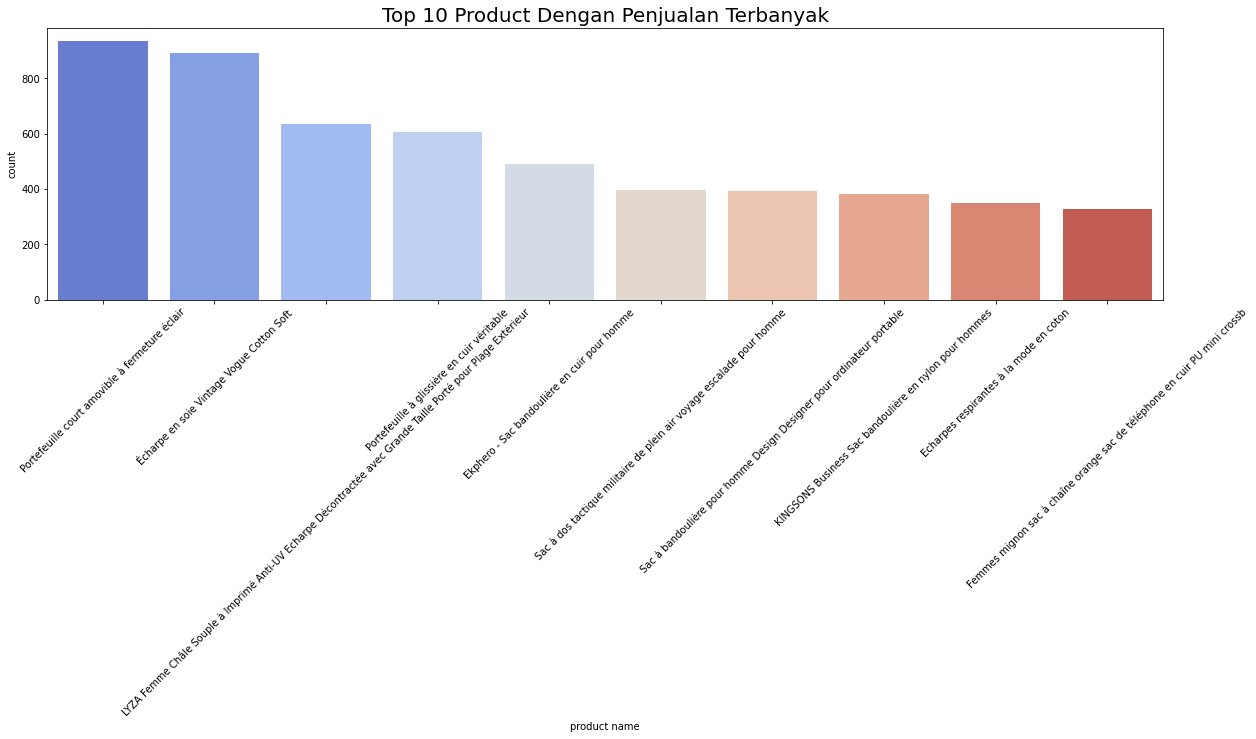

In [ ]:
plt.figure(figsize =(20,5))
sns.countplot(x='product name', data=events,
              order=events['product name'].value_counts().iloc[:10].index,palette ='coolwarm')
plt.title(label='Top 10 Product Dengan Penjualan Terbanyak', fontsize=20)
plt.xticks(rotation=45)

brand name
ZANZEA      17558.4400
Socofy      15747.3168
ChArmkpR    12157.8152
O-NEWE       9362.3945
 Menico      7214.5330
INCERUN      6615.0648
Lostisy      5676.2229
Celmia       5234.8369
Gracila      5017.0615
ZHI          4934.6377
Name: price after discount, dtype: float64


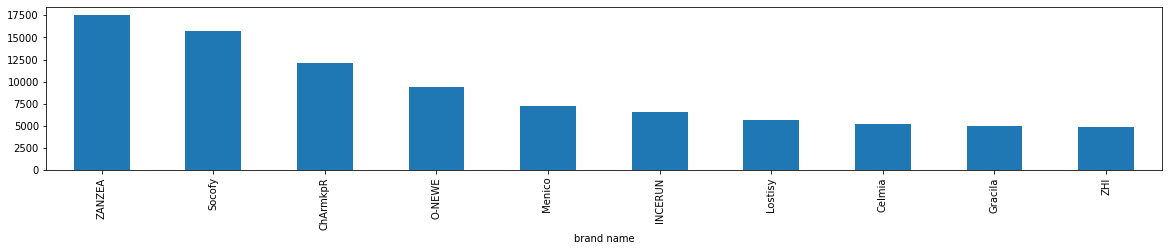

In [ ]:
#top 10 brand dengan profit tertinggi
print(events.groupby(['brand name'])['price after discount'].agg('sum').sort_values(ascending=False).head(10))
plt.rcParams["figure.figsize"] = (20,3)
events.groupby(['brand name'])['price after discount'].agg('sum').sort_values(ascending=False).head(10).plot(kind='bar')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

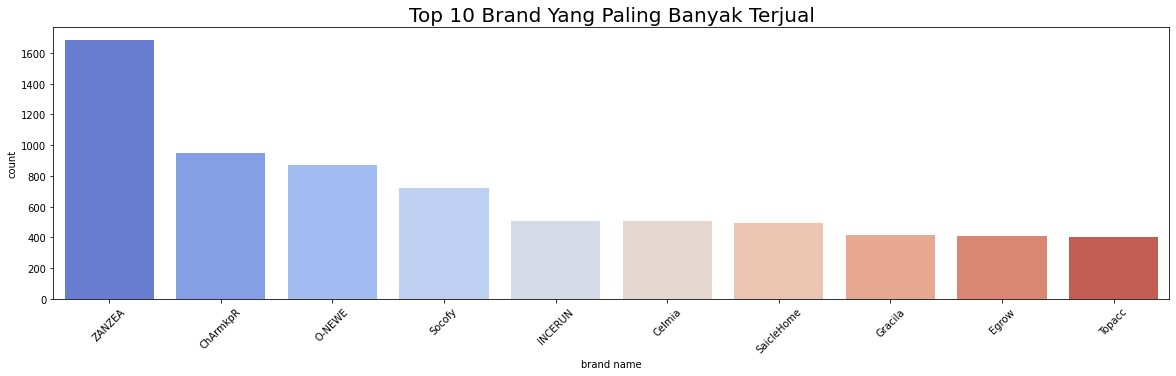

In [ ]:
plt.figure(figsize =(20,5))
sns.countplot(x='brand name', data=events,
              order=events['brand name'].value_counts().iloc[:10].index,palette ='coolwarm')
plt.title(label='Top 10 Brand Yang Paling Banyak Terjual', fontsize=20)
plt.xticks(rotation=45)

In [ ]:
#subcategori  terlaris top 10
events.groupby(['subcategory name'])['likes count'].agg('mean').sort_values(ascending=False).head(10)

subcategory name
Beanie Hat                1288.166667
Éponges                   1170.000000
Lampes de toilette        1116.000000
Bottes de pluie           1038.333333
Baking Mats & Liners       984.666667
Sacs de voyage             958.750000
Chaussettes & Collants     953.500000
Bonsai                     815.692308
Derbies & Mocassins        785.615023
Sleeping Bags              743.000000
Name: likes count, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

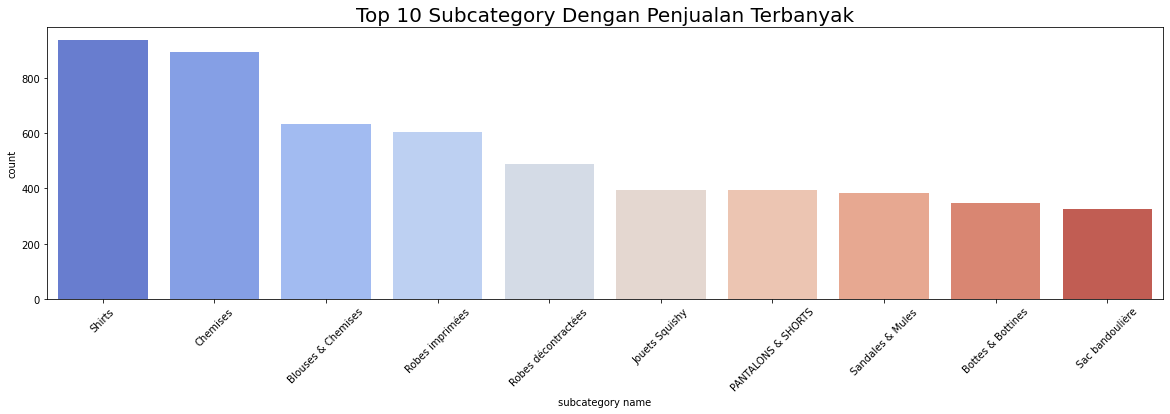

In [ ]:
plt.figure(figsize =(20,5))
sns.countplot(x='subcategory name', data=events,
              order=events['subcategory name'].value_counts().iloc[:10].index,palette ='coolwarm')
plt.title(label='Top 10 Subcategory Dengan Penjualan Terbanyak', fontsize=20)
plt.xticks(rotation=45)

category name
women          53876.7794
house          35409.6695
shoes          30690.0808
men            25023.0304
jewelry        13424.1329
bags           12981.6584
beauty          9475.7997
accessories      996.9407
kids             727.3940
Name: price after discount, dtype: float64


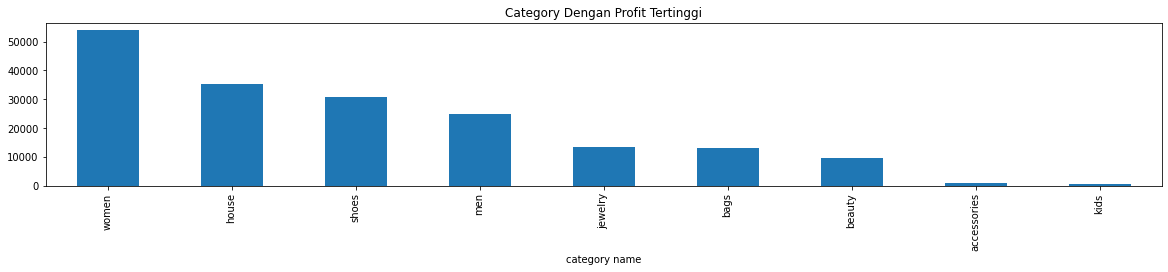

In [ ]:
#categori dengan profit tertinggi
print(events.groupby(['category name'])['price after discount'].agg('sum').sort_values(ascending=False))
plt.title('Category Dengan Profit Tertinggi')
plt.rcParams["figure.figsize"] = (20,3)
events.groupby(['category name'])['price after discount'].agg('sum').sort_values(ascending=False).plot(kind='bar')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

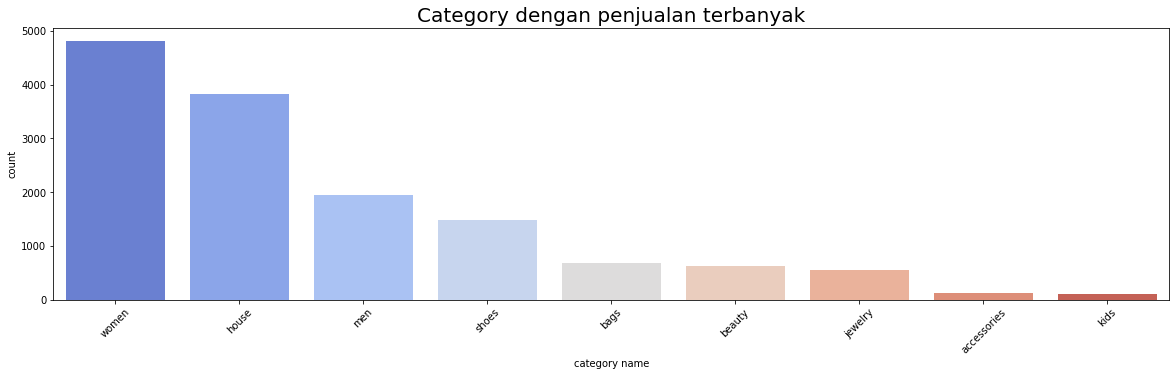

In [ ]:
plt.figure(figsize =(20,5))
sns.countplot(x='category name', data=events,
              order=events['category name'].value_counts().index,palette ='coolwarm')
plt.title(label='Category dengan penjualan terbanyak', fontsize=20)
plt.xticks(rotation=45)

In [ ]:
#warna terfavorit bersadarkan jumlah like
events.groupby(['colors'])['likes count'].agg('sum').sort_values(ascending=False).head(20)

colors
Modification    3215177
Black            399862
Blue             232695
Yellow           164565
White             15735
Name: likes count, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

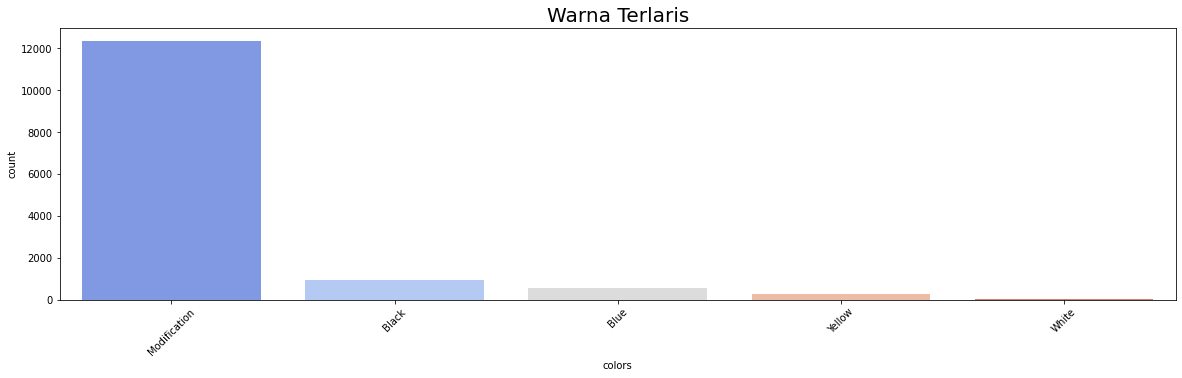

In [ ]:
plt.figure(figsize =(20,5))
sns.countplot(x='colors', data=events,
              order=events['colors'].value_counts().index,palette ='coolwarm')
plt.title(label='Warna Terlaris', fontsize=20)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

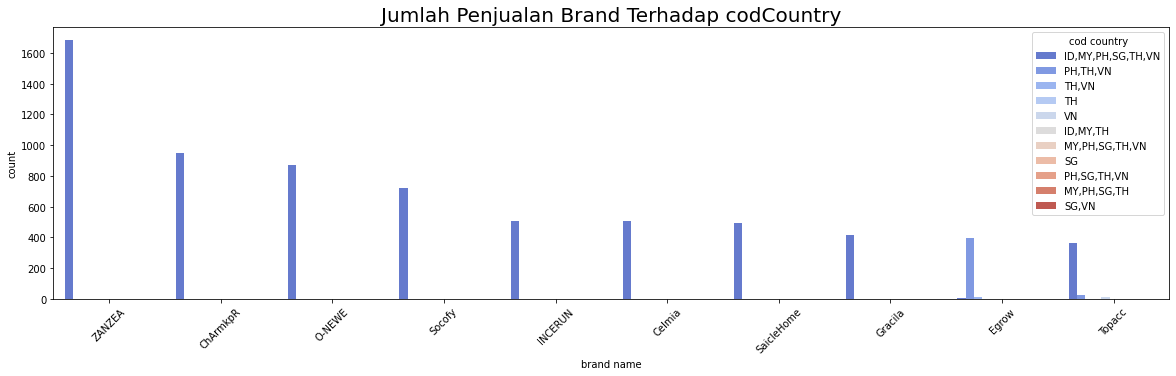

In [ ]:
plt.figure(figsize =(20,5))
sns.countplot(x='brand name', data=events, hue=events['cod country'],
              order=events['brand name'].value_counts().iloc[:10].index,palette ='coolwarm')
plt.title(label='Jumlah Penjualan Brand Terhadap codCountry', fontsize=20)
plt.xticks(rotation=45)

In [ ]:
events[['product name','category name','subcategory name','brand name','colors','product status',
        'price','percentage discount','price after discount','likes count']].sort_values(by='likes count', ascending=False).head(10).style.background_gradient(cmap ='Wistia')

,product name,category name,subcategory name,brand name,colors,product status,price,percentage discount,price after discount,likes count
182,Sac à bandoulière multifonction Design Business,shoes,Derbies & Mocassins,Lostisy,Black,old,30.080000,45.000000,16.544000,15203
575,Echarpes respirantes à la mode en coton,shoes,Bottes & Bottines,Lostisy,Black,old,9.990000,77.000000,2.297700,13615
4857,Sac à bandoulière pour homme Sac à bandoulière USB pour utilisateur,women,Vestes & Gilets,Gracila,Yellow,old,38.840000,51.000000,19.031600,12482
655,Sac à bandoulière multifonction Design Business,shoes,Derbies & Mocassins,Socofy,Yellow,old,34.990000,49.000000,17.844900,12227
656,Sac à bandoulière multifonction Design Business,shoes,Derbies & Mocassins,Socofy,Yellow,old,34.990000,49.000000,17.844900,12227
900,Sac à bandoulière multifonction Design Business,shoes,Derbies & Mocassins,Socofy,Blue,old,73.740000,39.000000,44.981400,12005
2125,Sac à bandoulière pour homme Sac à bandoulière USB pour utilisateur,women,Vestes & Gilets,O-NEWE,Yellow,old,25.990000,85.000000,3.898500,10965
1970,Echarpes respirantes à la mode en coton,shoes,Bottes & Bottines,Socofy,Modification,old,126.090000,24.000000,95.828400,10146
2242,LYZA Femme Châle Souple à Imprimé Anti-UV Echarpe Décontractée avec Grande Taille Porté pour Plage Extérieur,women,Blouses & Chemises,Gracila,Modification,old,16.150000,57.000000,6.944500,9841
4448,Portefeuille à glissière en cuir véritable,women,Robes imprimées,Gracila,Modification,old,26.390000,59.000000,10.819900,9692


# Recomendation Product Based on Brand Name


In [ ]:
def recommend_product_on_likes(x):
  likes = events[events['brand name']==x][['product name','category name','subcategory name','colors','colors1',
                                            'brand name','price','percentage discount','price after discount','likes count','cod country']]
  likes = likes.sort_values(by = 'likes count', ascending =False)
  return likes.head(10)



In [ ]:
recommend_product_on_likes('ZANZEA')

,product name,category name,subcategory name,colors,colors1,brand name,price,percentage discount,price after discount,likes count,cod country
863,Écharpe en soie Vintage Vogue Cotton Soft,women,Chemises,Black,Modification,ZANZEA,20.99,47.0,11.1247,8351,"ID,MY,PH,SG,TH,VN"
456,Mini sac de taille en cuir véritable,women,Robes vintage,Modification,Modification,ZANZEA,22.99,64.0,8.2764,7254,"ID,MY,PH,SG,TH,VN"
2096,Écharpe en soie Vintage Vogue Cotton Soft,women,Chemises,Blue,Black,ZANZEA,11.88,69.0,3.6828,7090,"ID,MY,PH,SG,TH,VN"
1042,Sac à bandoulière en cuir de vachette multifon...,women,Robes maxi,Blue,White,ZANZEA,19.99,66.0,6.7966,6908,"ID,MY,PH,SG,TH,VN"
1669,LYZA Femme Châle Souple à Imprimé Anti-UV Echa...,women,Blouses & Chemises,Modification,Yellow,ZANZEA,18.54,58.0,7.7868,5811,"ID,MY,PH,SG,TH,VN"
1819,Maillot surdimensionné Echarpe longue Châle chaud,women,Combinaison & Salopette,Modification,Modification,ZANZEA,16.99,76.0,4.0776,5794,"ID,MY,PH,SG,TH,VN"
3385,Sac à bandoulière pour homme Design Designer p...,women,PANTALONS & SHORTS,Modification,Black,ZANZEA,20.19,59.0,8.2779,5646,"ID,MY,PH,SG,TH,VN"
1467,Sac à bandoulière pour homme Sac à bandoulière...,women,Vestes & Gilets,Modification,Modification,ZANZEA,32.32,57.0,13.8976,5568,"ID,MY,PH,SG,TH,VN"
5700,Écharpe en soie Vintage Vogue Cotton Soft,women,Chemises,Modification,Modification,ZANZEA,19.99,66.0,6.7966,4548,"ID,MY,PH,SG,TH,VN"
1433,Mini sac de taille en cuir véritable,women,Robes vintage,Modification,Modification,ZANZEA,36.34,49.0,18.5334,4513,"ID,MY,PH,SG,TH,VN"


# Kesimpulan
1. produk Portefeuille court amovible à fermeture éclair adalah produk yang paling banyak terjual.
2. Brand Zanzea merupakan brand dengan profit tertinggi dan sekaligus merupakan yang paling sering terjual.
3. 10 brand teratas banyak diminati dari 5 negara.
4. untuk categori yang paling sering terjual adalahh categori women, ini menunjukkan bahwa banyak pelanggan berasal dari gender wanita.
5. produk dengan varian warna merupakan produk yang paling laris terjual dibandingkan dengan produk produk hanya memliki satu warna saja.

Rekomendasi :
1. dalam situs olshop merekomendasikan brand nama 10 teratas kepada pengunjung website.
2. klasifikasikan pengunjung berdasarkan gender, dapat dilihat jika pengunjung adalah gender wanita maka rekomendasikan brand ZANZEA dengan varian warna yang berbeda, karena memiliki peluang yang besar untuk dibeli.

In [ ]:
#events.to_csv(path + 'events_clean.csv', index =False)